# Importing the dataset and  cleaning it

In [161]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
os.chdir('C:\\Users\\mcoge\\Downloads\\Terrorism attacks')
df=pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.shape

(181691, 135)

In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data cleaning

### Dropping columns useless

In [19]:
df1=df.drop(['approxdate', 'extended', 'resolution', 'specificity', 'vicinity', 'country', 'region',
         'provstate', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
         'INT_MISC', 'INT_ANY', 'related', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus',
         'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'property', 'propvalue', 'propcomment', 
         'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomnote',
         'propextent', 'propextent_txt', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 
         'alternative_txt', 'multiple', 'attacktype1', 'attacktype2', 'attacktype3', 'weaptype1',
         'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3',
         'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weapsubtype4', 'weapsubtype4_txt', 'claimmode',
         'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
         'compclaim', 'natlty1', 'natlty2', 'natlty3', 'gsubname', 'gsubname2', 'gsubname3', 'corp1','corp2',
         'corp3', 'gname2', 'gname3','guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 
         'nperpcap', 'attacktype2_txt', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
         'targsubtype2_txt', 'target2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3',
         'targsubtype3_txt', 'target3', 'natlty3_txt', 'weaptype2_txt', 'weaptype3_txt', 'weaptype4_txt',
         'location', 'motive', 'targtype1', 'targsubtype1', 'imonth', 'iday', 'summary', 'claimed', 'eventid',
         'target1', 'targsubtype1_txt', 'weapdetail'
        ], axis=1)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   country_txt      181691 non-null  object 
 2   region_txt       181691 non-null  object 
 3   city             181257 non-null  object 
 4   latitude         177135 non-null  float64
 5   longitude        177134 non-null  float64
 6   success          181691 non-null  int64  
 7   suicide          181691 non-null  int64  
 8   attacktype1_txt  181691 non-null  object 
 9   targtype1_txt    181691 non-null  object 
 10  natlty1_txt      180132 non-null  object 
 11  gname            181691 non-null  object 
 12  weaptype1_txt    181691 non-null  object 
 13  nkill            171378 non-null  float64
 14  nkillus          117245 non-null  float64
 15  nkillter         114733 non-null  float64
 16  nwound           165380 non-null  floa

## Renaming of the columns

In [25]:
#rename the columns before starting data analysis
df1.rename({'iyear':'year','country_txt': 'country', 'region_txt':'region', 'attacktype1_txt': 'attack_type',
           'targtype1_txt':'target_type', 'natlty1_txt':'nationality', 'weaptype1_txt':'weapon_type', 
            'nkill':'killed', 'nkillus':'kill_us', 'nkillter':'terrorists_killed', 'nwound':'wounded', 
            'nwoundus':'woundeded_us', 'nwoundte':'terrorists_wounded'}, axis=1, inplace=True)

In [34]:
# save the dataset cleaned
df1.to_csv('cleaned_dataset.csv')

In [35]:
# make a copy to avoid problems with the dataframe
df2=df1.copy()

# First Analysis

In [28]:
# Number of terrorist attacks since 1970
len(df1.year)

181691

In [27]:
# Victims of terrorism (killed and wounded)
df1['wounded'] = df1['wounded'].fillna(0).astype(int)
df1['killed'] = df1['killed'].fillna(0).astype(int)
df1['victims'] = df1['killed'] + df1['wounded']
df1['victims'].sum()

935736

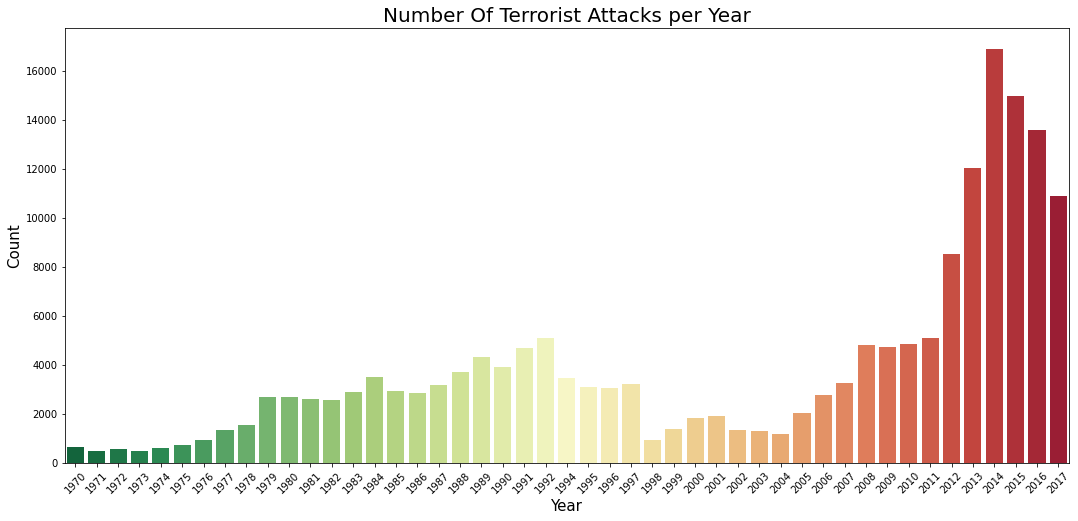

In [186]:
# Evolution of number of terrorist attacks per year
plt.subplots(figsize=(18,8))
sns.countplot('year',data=df2,palette='RdYlGn_r')
plt.title('Number Of Terrorist Attacks per Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.savefig('Terrorist attacks per year.jpg')
plt.show()

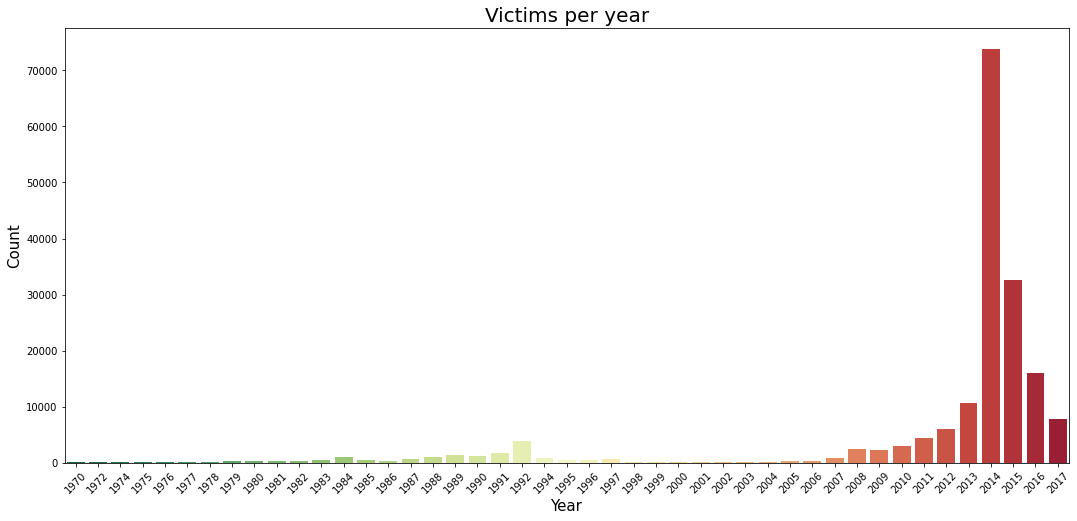

In [189]:
# Number of victims per year
plt.subplots(figsize=(18,8))
sns.barplot(df2['year'].value_counts()[:45].index,df2['victims'].value_counts()[:45].values,palette='RdYlGn_r')
plt.title('Victims per year', fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 45)
plt.savefig('Victims per year.jpg')
plt.show()

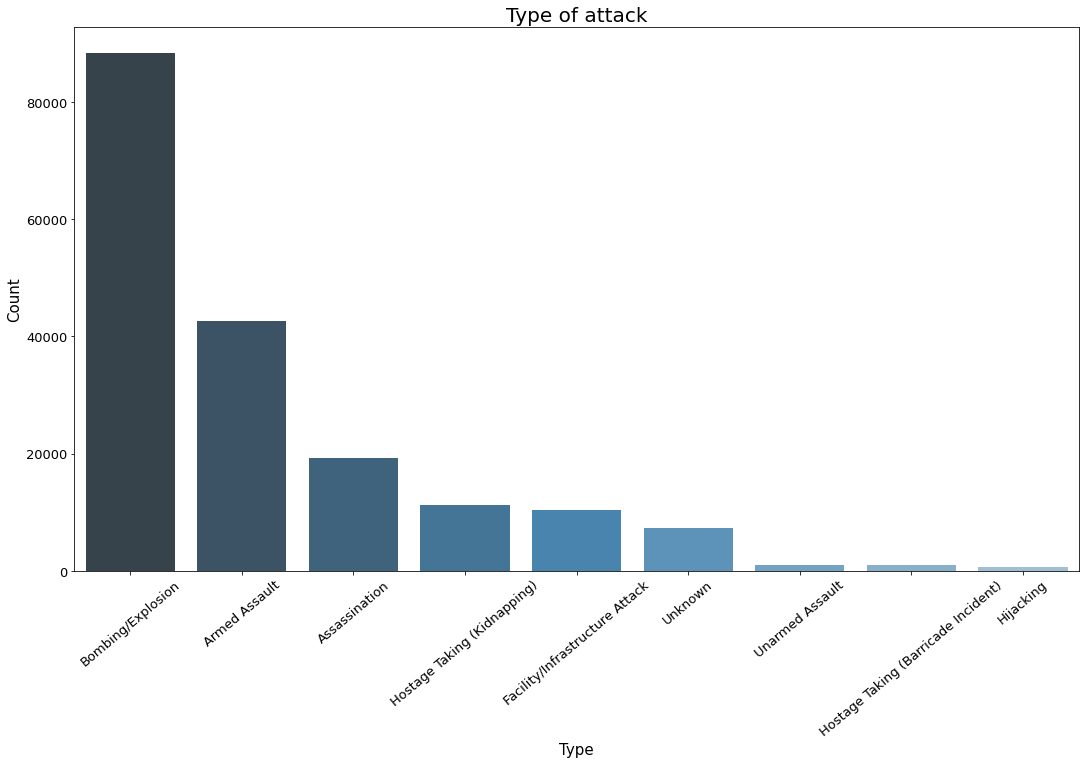

In [199]:
# The method of attack and tactics used
plt.subplots(figsize=(18,10))
sns.barplot(df1['attack_type'].value_counts().index, df1['attack_type'].value_counts().values,palette='Blues_d')
plt.title('Type of attack', fontsize=20)
plt.xlabel('Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 40, fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('Type of attack.jpg')
plt.show()


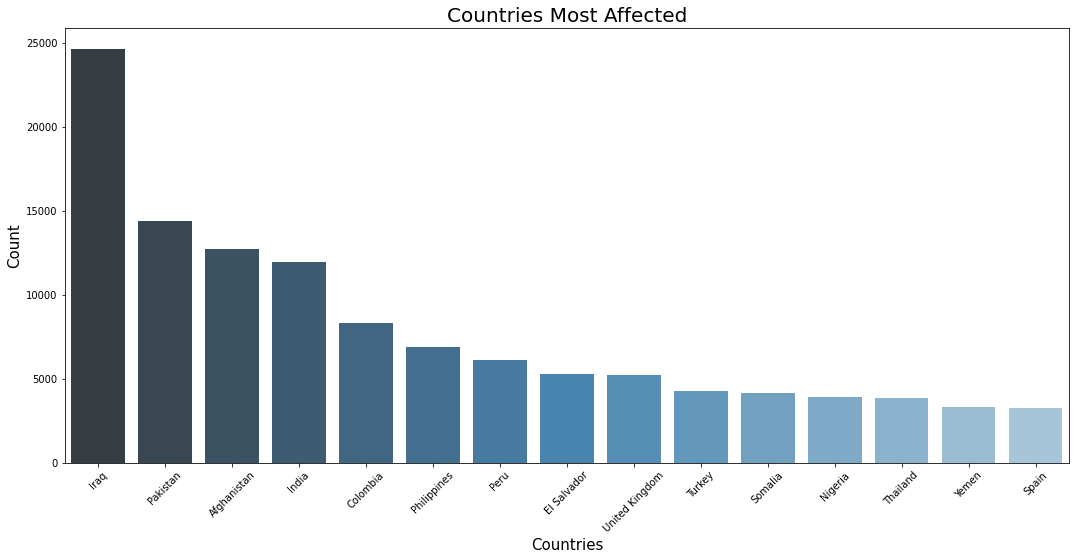

In [194]:
# The number of attacks per country since 1970
plt.subplots(figsize=(18,8))
sns.barplot(df2['country'].value_counts()[:15].index,
            df2['country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Countries Most Affected', fontsize=20)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 45)
plt.savefig('Countries affected.jpg')
plt.show()

# Maps creation with GeoPandas

In [36]:
import geopandas

### Choropleth map of most attacks

In [37]:
# Import the map of the world
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [38]:
# Creation of a pivot table where the number of attacks is counted 
attacks=df2.pivot_table(index="country",
                        values='victims',
                        aggfunc="count").sort_values('victims',
                                                     ascending=False).reset_index()

In [39]:
# Merge the table world with the nomber of terrorist attacks by country 
merged = world.set_index('name').join(attacks.set_index('country'))

In [40]:
# Fill the NaN values in attacks with zero and rename the column attacks 
# because we juste count the number of rows per country
merged.victims.fillna(0, inplace=True)
merged.rename(columns={'victims':'attacks'}, inplace=True)

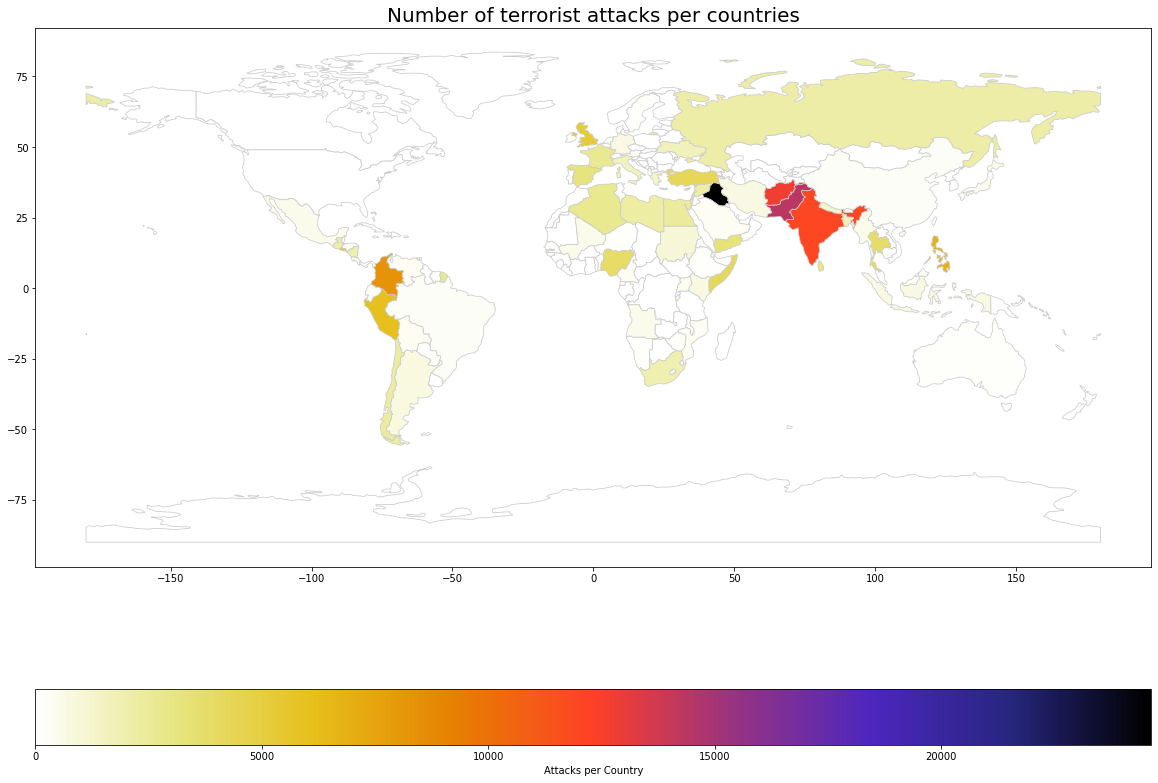

In [172]:
fig, ax = plt.subplots(1, figsize=(20, 15))
merged.plot(column='attacks',
            cmap='CMRmap_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend_kwds={'label': "Attacks per Country", 'orientation': "horizontal"})
ax.set_title('Number of terrorist attacks per countries', fontsize=20)
plt.savefig('Terrorist attacks per countries.jpg')
plt.show()

### Choropleth map of most victims by terrorist attacks

In [42]:
# Creation of a pivot table where the number of people kill is summed 
victims=df2.pivot_table(index="country",
                       values='victims',
                       aggfunc="sum").sort_values('victims',
                                                  ascending=False).reset_index()

In [44]:
# Merge the table world with the number of people killed by country 
merged2 = world.set_index('name').join(victims.set_index('country'))

In [45]:
# Fill the NaN values in attacks with zero and rename the column
#merged2.rename(columns={'nkill':'killed'}, inplace=True)
merged2.victims.fillna(0, inplace=True)

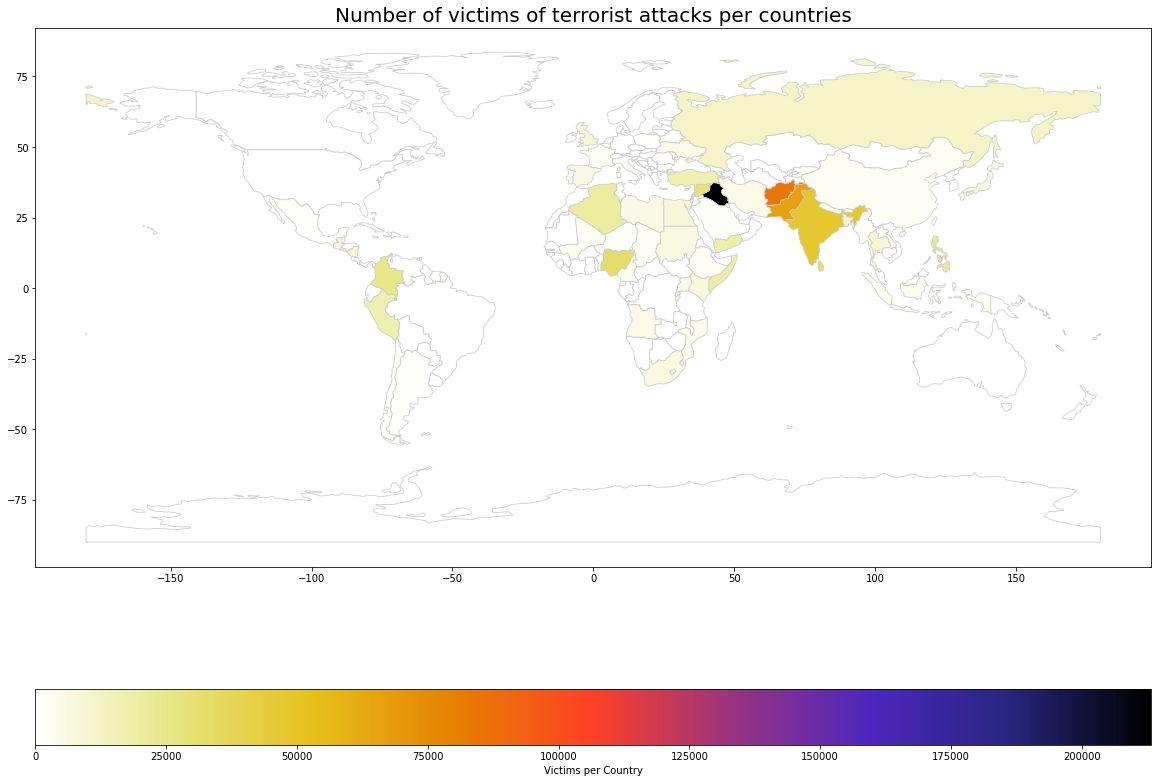

In [157]:
fig, ax = plt.subplots(1, figsize=(20, 15))
merged2.plot(column='victims',
            cmap='CMRmap_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend_kwds={'label': "Victims per Country", 'orientation': "horizontal"})
ax.set_title('Number of victims of terrorist attacks per countries', fontsize=20)
plt.savefig('Victims of terrorism attacks per countries.jpg')
plt.show()

# Attacks in the different decades

Creation of a serie of maps to have an overview of the number of attacks per decade since 1970.

### 1970's

In [51]:
# Creation of a df70s which is focused on the seventies with a date range
start_date = 1969
end_date = 1979

mask70 = (df2['year'] > start_date) & (df2['year'] <= end_date) 
df70s = df3.loc[mask70]

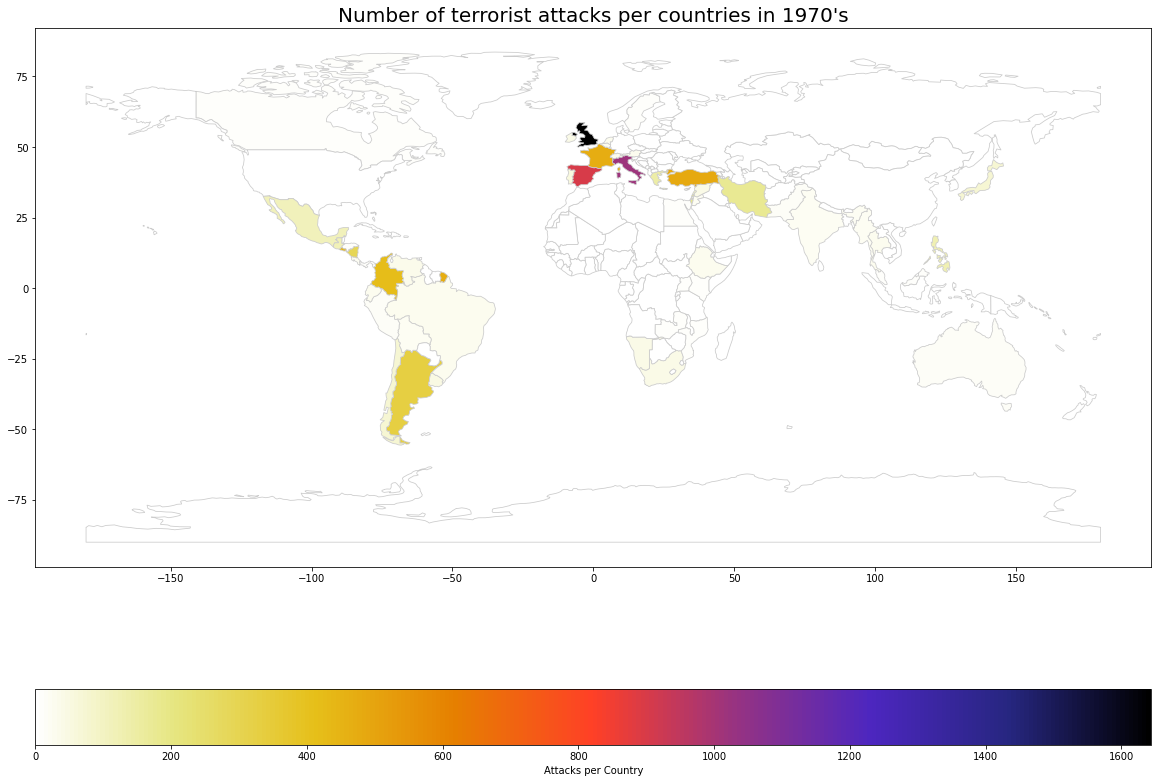

In [173]:
# Creation of a pivot table where the number of attacks is counted 
attacks70=df70s.pivot_table(index="country",
                        values='victims',
                        aggfunc="count").sort_values('victims',
                                                     ascending=False).reset_index()

# Merge the table world with the nomber of terrorist attacks by country 
merged70 = world.set_index('name').join(attacks70.set_index('country'))

# Fill the NaN values in victims with zero
merged70.victims.fillna(0, inplace=True)

# Creation of the map of attacks in the 1970's 
fig, ax = plt.subplots(1, figsize=(20, 15))
merged70.plot(column='victims',
            cmap='CMRmap_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend_kwds={'label': "Attacks per Country", 'orientation': "horizontal"})
ax.set_title('Number of terrorist attacks per countries in 1970\'s', fontsize=20)
plt.savefig('Terrorist attacks per countries in 1970\'s.jpg')
plt.show()

### 1980's

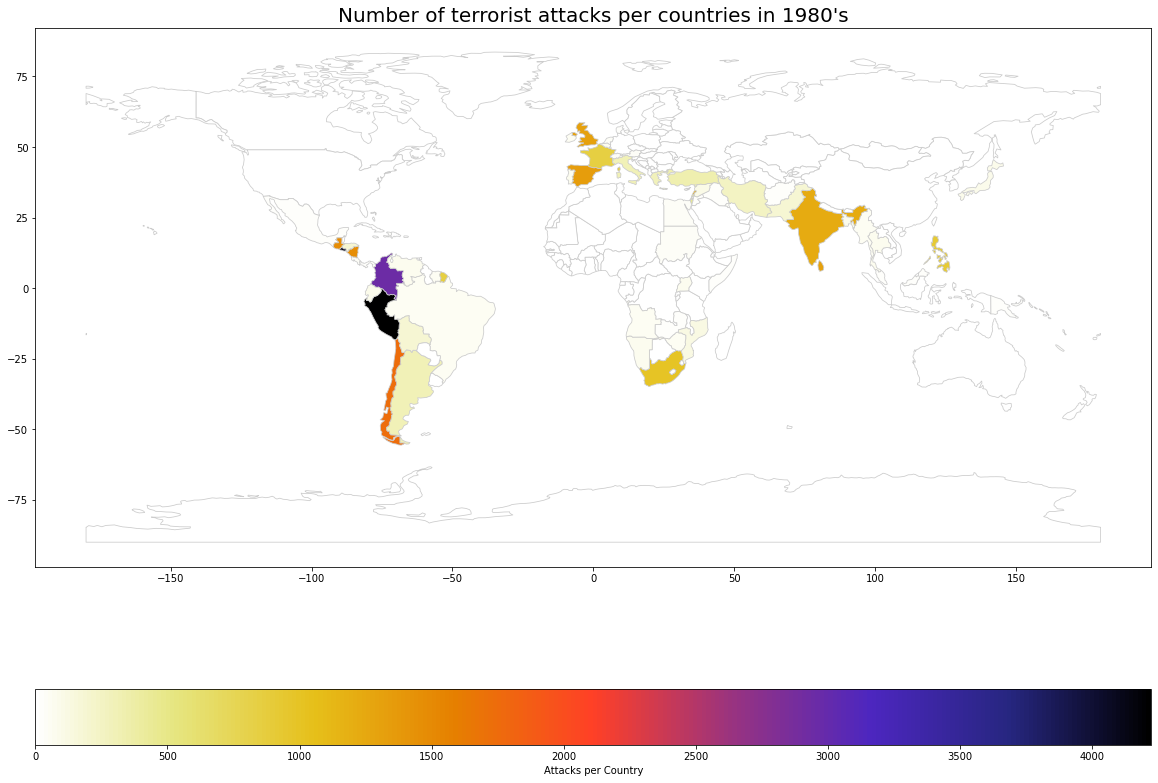

In [174]:
start_date2 = 1979
end_date2 = 1989

mask80 = (df2['year'] > start_date2) & (df2['year'] <= end_date2)

# Creation of a df80s which is focused on the seventies
df80s = df3.loc[mask80]

# Creation of a pivot table where the number of attacks is counted 
attacks80=df80s.pivot_table(index="country",
                        values='victims',
                        aggfunc="count").sort_values('victims',
                                                     ascending=False).reset_index()

# Merge the table world with the nomber of terrorist attacks by country 
merged80 = world.set_index('name').join(attacks80.set_index('country'))

# Fill the NaN values in victims with zero
merged80.victims.fillna(0, inplace=True)

# Creation of the map of attacks in the 1980's 
fig, ax = plt.subplots(1, figsize=(20, 15))
merged80.plot(column='victims',
            cmap='CMRmap_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend_kwds={'label': "Attacks per Country", 'orientation': "horizontal"})
ax.set_title('Number of terrorist attacks per countries in 1980\'s', fontsize=20)
plt.savefig('Terrorist attacks per countries in 1980\'s.jpg')
plt.show()

### 1990's

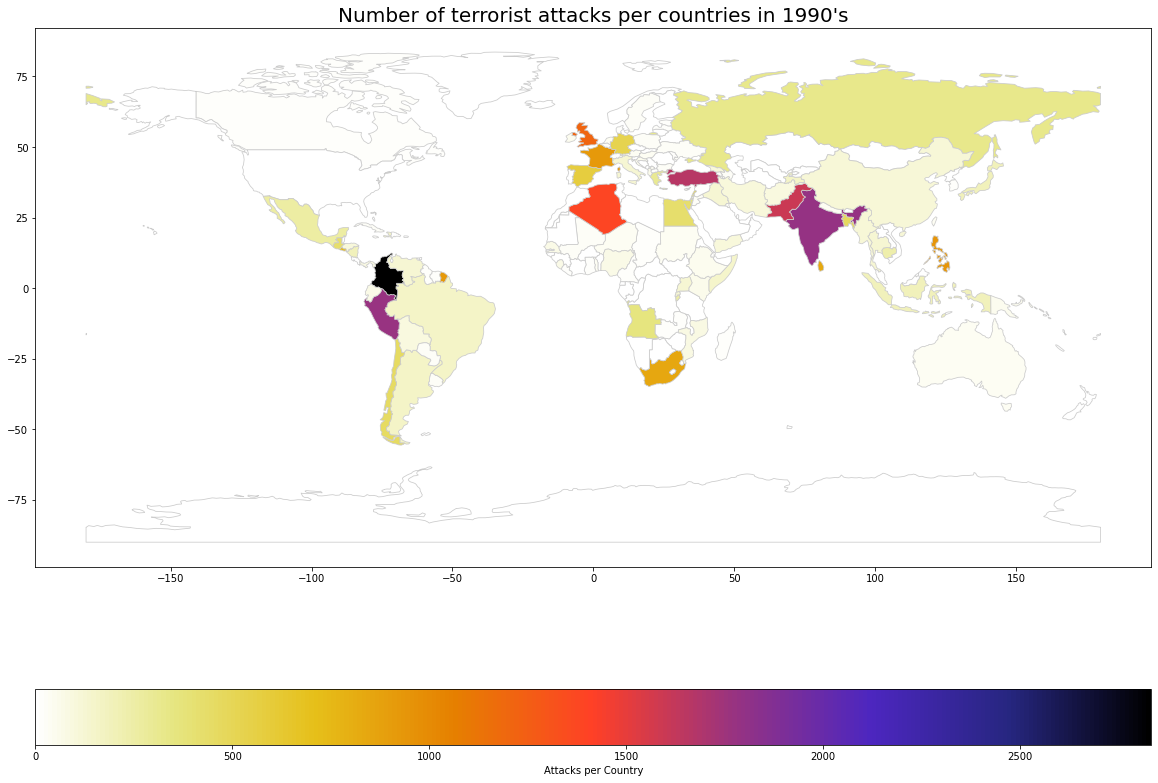

In [178]:
start_date3 = 1989
end_date3 = 1999

mask90 = (df3['year'] > start_date3) & (df3['year'] <= end_date3)

# Creation of a df4 which is focused on the seventies
df90s = df3.loc[mask90]

# Creation of a pivot table where the number of attacks is counted 
attacks90=df90s.pivot_table(index="country",
                        values='victims',
                        aggfunc="count").sort_values('victims',
                                                     ascending=False).reset_index()

# Merge the table world with the nomber of terrorist attacks by country 
merged90 = world.set_index('name').join(attacks90.set_index('country'))

# Fill the NaN values in victims with zero
merged90.victims.fillna(0, inplace=True)

# Creation of the map of attacks in the 1990's 
fig, ax = plt.subplots(1, figsize=(20, 15))
merged90.plot(column='victims',
            cmap='CMRmap_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend_kwds={'label': "Attacks per Country", 'orientation': "horizontal"})
ax.set_title('Number of terrorist attacks per countries in 1990\'s', fontsize=20)
plt.savefig('Terrorist attacks per countries in 1990\'s.jpg')
plt.show()

### 2000's

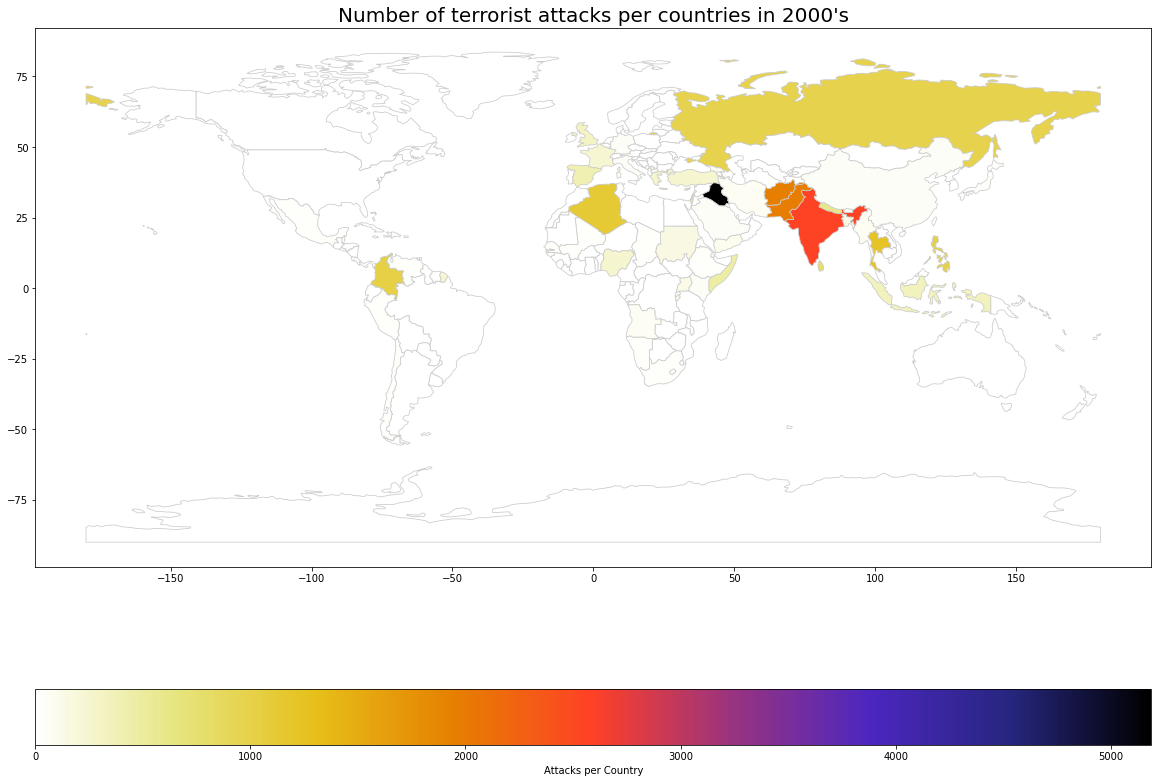

In [176]:
start_date4 = 1999
end_date4 = 2009

mask00 = (df3['year'] > start_date4) & (df3['year'] <= end_date4)

# Creation of a df4 which is focused on the seventies
df00s = df3.loc[mask00]

# Creation of a pivot table where the number of attacks is counted 
attacks00=df00s.pivot_table(index="country",
                        values='victims',
                        aggfunc="count").sort_values('victims',
                                                     ascending=False).reset_index()

# Merge the table world with the nomber of terrorist attacks by country 
merged00 = world.set_index('name').join(attacks00.set_index('country'))

# Fill the NaN values in victims with zero 
merged00.victims.fillna(0, inplace=True)

# Creation of the map of attacks in the 2000's 
fig, ax = plt.subplots(1, figsize=(20, 15))
merged00.plot(column='victims',
            cmap='CMRmap_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend_kwds={'label': "Attacks per Country", 'orientation': "horizontal"})
ax.set_title('Number of terrorist attacks per countries in 2000\'s', fontsize=20)
plt.savefig('Terrorist attacks per countries in 2000\'s.jpg')
plt.show()

### 2010's

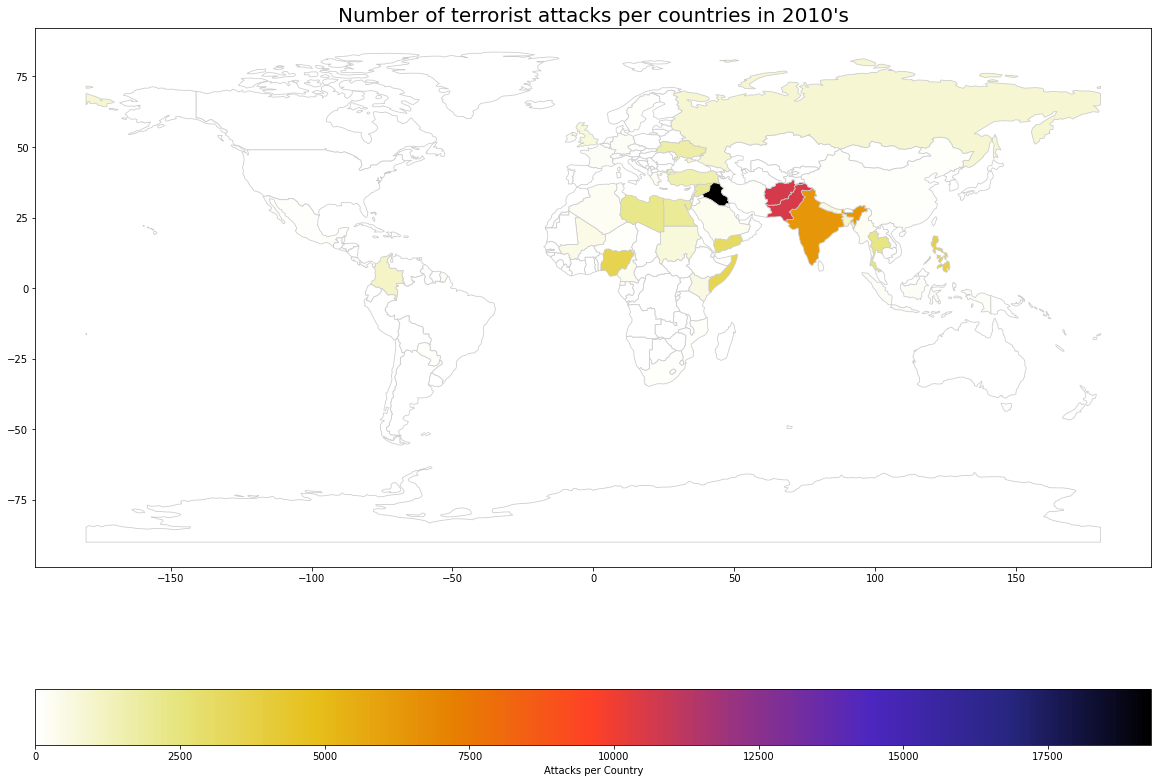

In [177]:
start_date5 = 2009
end_date5 = 2017

mask10 = (df3['year'] > start_date5) & (df3['year'] <= end_date5)

# Creation of a df4 which is focused on the seventies
df10s = df3.loc[mask10]

# Creation of a pivot table where the number of attacks is counted 
attacks10=df10s.pivot_table(index="country",
                        values='victims',
                        aggfunc="count").sort_values('victims',
                                                     ascending=False).reset_index()

# Merge the table world with the nomber of terrorist attacks by country 
merged10 = world.set_index('name').join(attacks10.set_index('country'))

# Fill the NaN values in victims with zero 
merged10.victims.fillna(0, inplace=True)

# Creation of the map of attacks in the 2010's 
fig, ax = plt.subplots(1, figsize=(20, 15))
merged10.plot(column='victims',
            cmap='CMRmap_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend_kwds={'label': "Attacks per Country", 'orientation': "horizontal"})
ax.set_title('Number of terrorist attacks per countries in 2010\'s', fontsize=20)
plt.savefig('Terrorist attacks per countries in 2010\'s.jpg')
plt.show()

# Tipping point

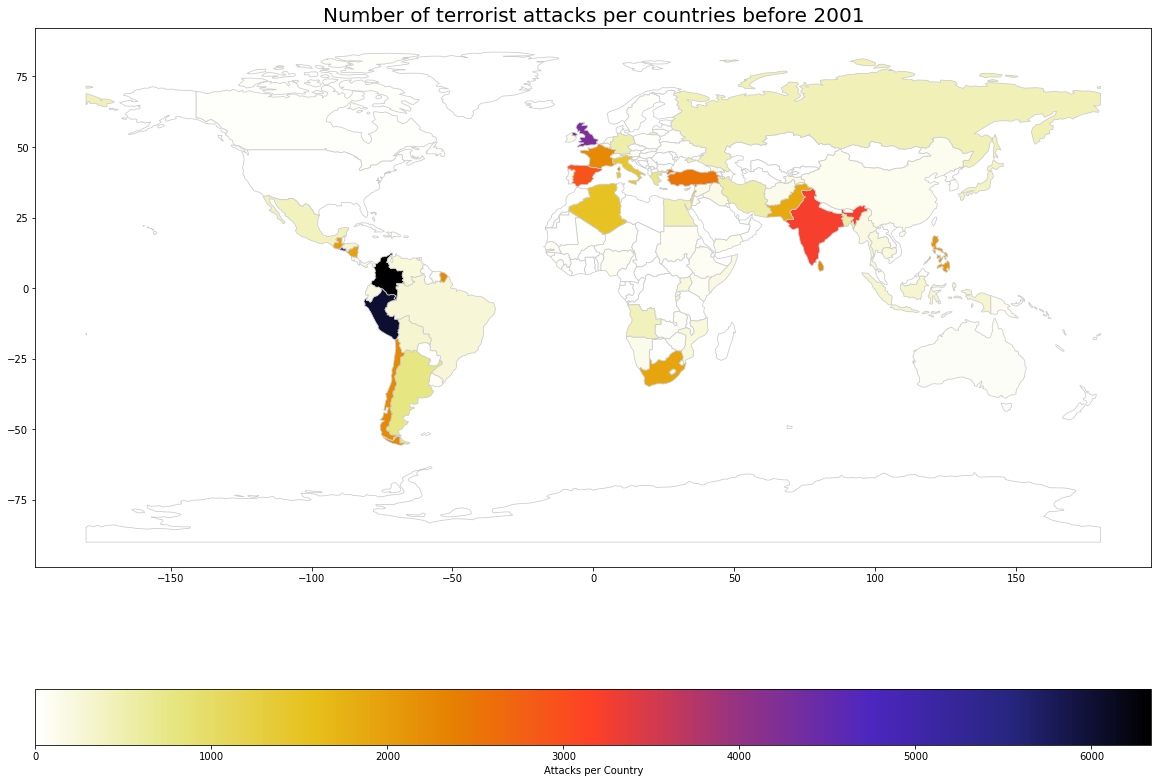

In [195]:
#Before 2001
start_date = 1969
end_date = 2001

mask1 = (df3['year'] > start_date) & (df3['year'] < end_date)

# Creation of a df which is focused before 2001
df2000 = df3.loc[mask1]

# Creation of a pivot table where the number of attacks is counted 
attacks2000=df2000.pivot_table(index="country",
                        values='victims',
                        aggfunc="count").sort_values('victims',
                                                     ascending=False).reset_index()

# Merge the table world with the nomber of terrorist attacks by country 
merged2000 = world.set_index('name').join(attacks2000.set_index('country'))

# Fill the NaN values in attacks with zero
merged2000.victims.fillna(0, inplace=True)

# Creation of the map of attacks before 2001
fig, ax = plt.subplots(1, figsize=(20, 15))
merged2000.plot(column='victims',
            cmap='CMRmap_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend_kwds={'label': "Attacks per Country", 'orientation': "horizontal"})
ax.set_title('Number of terrorist attacks per countries before 2001', fontsize=20)
plt.savefig('Terrorist attacks per countries before 2001.jpg')
plt.show()

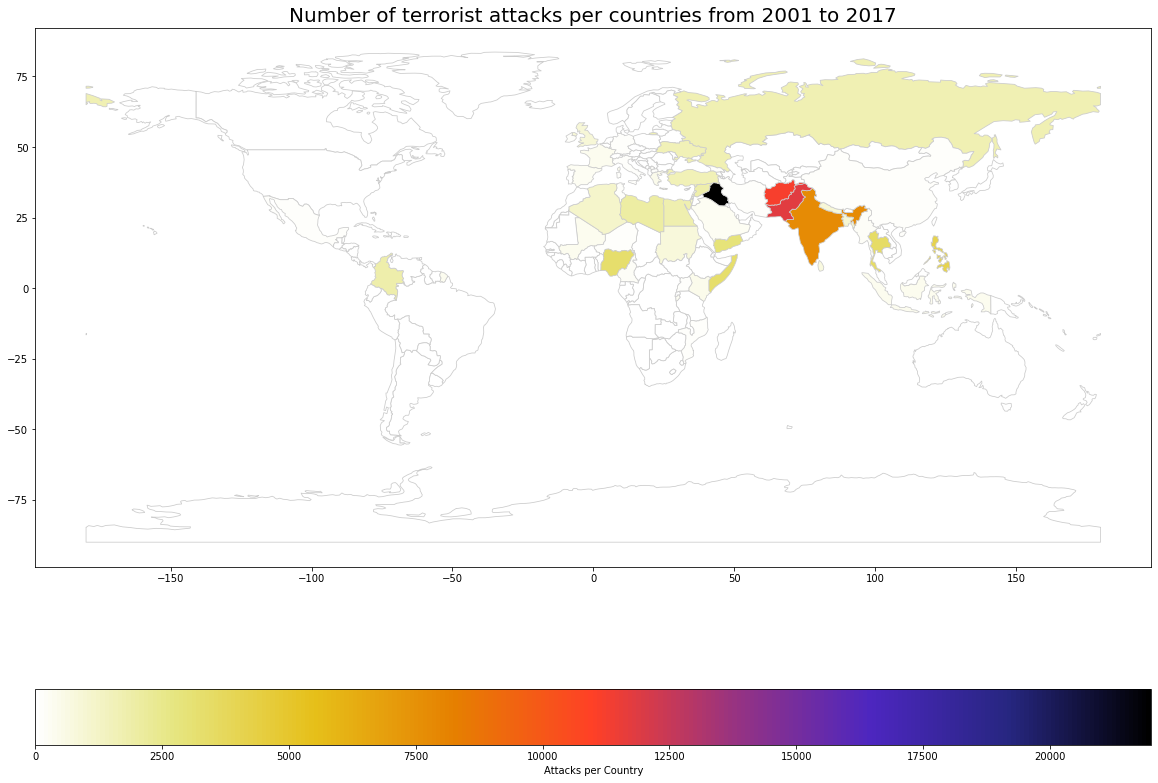

In [196]:
#Before 2001
start_date = 2000
end_date = 2017

mask2 = (df3['year'] > start_date) & (df3['year'] < end_date)

# Creation of a df for 2001 and after
df2001 = df3.loc[mask2]

# Creation of a pivot table where the number of attacks is counted 
attacks2001=df2001.pivot_table(index="country",
                        values='victims',
                        aggfunc="count").sort_values('victims',
                                                     ascending=False).reset_index()

# Merge the table world with the nomber of terrorist attacks by country 
merged2001 = world.set_index('name').join(attacks2001.set_index('country'))

# Fill the NaN values in victims with zero 
merged2001.victims.fillna(0, inplace=True)

# Creation of the map of attacks before 2001
fig, ax = plt.subplots(1, figsize=(20, 15))
merged2001.plot(column='victims',
            cmap='CMRmap_r', 
            legend=True, 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend_kwds={'label': "Attacks per Country", 'orientation': "horizontal"})
ax.set_title('Number of terrorist attacks per countries from 2001 to 2017', fontsize=20)
plt.savefig('Terrorist attacks per countries from 2001.jpg')
plt.show()

# Attacks before 911

In [79]:
df2000.victims.agg(['count', 'sum', 'mean'])

count     71650.000000
sum      286502.000000
mean          3.998632
Name: victims, dtype: float64

In [80]:
df2001.victims.agg(['count', 'sum', 'mean'])

count     99141.000000
sum      597862.000000
mean          6.030421
Name: victims, dtype: float64

In [82]:
df2001.victims.sum()/df2000.victims.sum()

2.0867637922248363

In [83]:
df2001.victims.count()/df2000.victims.count()

1.3836845778087927

In [84]:
# Number of attacks by year before 911
np.mean(df2000.groupby(['year']).victims.count())

2388.3333333333335

In [85]:
# Number of attacks by year after 911
np.mean(df2001.groupby(['year']).victims.count())

6196.3125

In [86]:
# Number of deaths due to terrorist attacks by year before 911
np.mean(df2000.groupby(['year']).victims.sum())

9550.066666666668

In [87]:
# Number of deaths due to terrorist attacks by year before 911
np.mean(df2001.groupby(['year']).victims.sum())

37366.375

## Focus on Iraq

In [117]:
list_of_years=df2.year.unique()

In [96]:
df_Iraq = df2[(df2.country == "Iraq")] # Iraq's Data

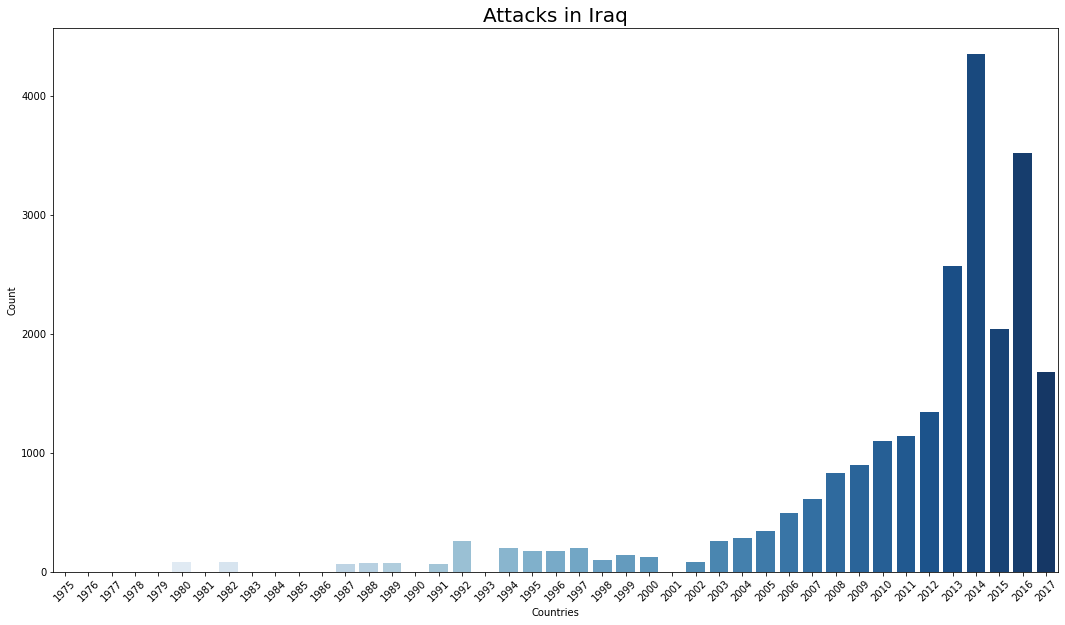

In [197]:
plt.subplots(figsize=(18,10))
sns.barplot(df_Iraq['year'].value_counts()[:30].index,
            df_Iraq['victims'].value_counts()[:30].values,palette='Blues',
           order = list(range(df_Iraq.year.min(),df_Iraq.year.max()+1)))
plt.title('Attacks in Iraq', fontsize=20)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.savefig('Attacks in Iraq per year.jpg', dpi=150)
plt.show()

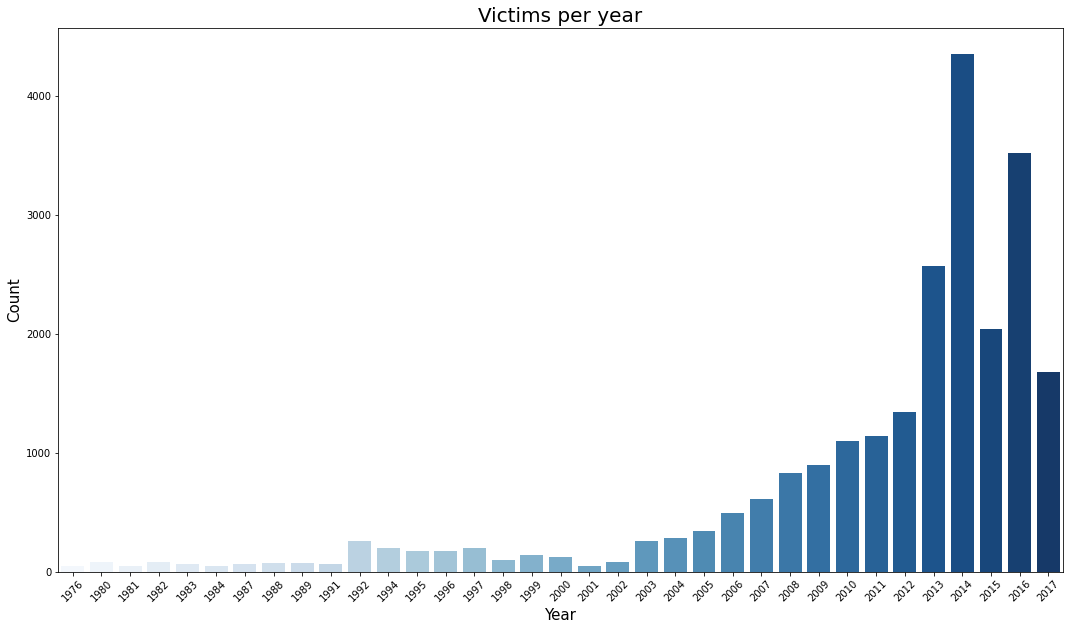

In [198]:
plt.subplots(figsize=(18,10))
sns.barplot(df_Iraq['year'].value_counts()[:35].index,
            df_Iraq['victims'].value_counts()[:35].values,palette='Blues')
plt.title('Victims per year', fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 45)
plt.savefig('Victims per year in Iraq.jpg')
plt.show()